In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
# from pytrends.request import TrendReq

In [15]:
movies_origin = pd.read_csv("imdb_filtered.csv")

movies_clear = movies_origin.dropna(axis=0)
movies_clear['Released_Year'] = pd.to_numeric(movies_clear['Released_Year'], errors='coerce')

movies = movies_clear[movies_clear["Released_Year"] >= 2010]

names = movies["Series_Title"]
years = movies["Released_Year"]
imdb = movies["IMDB_Rating"]
metarating = movies["Meta_score"]
gross = movies["Gross"]


directors = []
for x in movies["Director"]:
    if x not in directors:
        directors.append(x)

MeanRatings = []
for x in directors:
    # DirectorX eh uma variavel temporaria usada apenas neste loop
    DirectorX = movies[movies["Director"] == x]
    MeanRatings.append(np.mean(DirectorX["IMDB_Rating"]))


/tmp/ipykernel_9539/2070180221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clear['Released_Year'] = pd.to_numeric(movies_clear['Released_Year'], errors='coerce')


[('Christopher Nolan', array([0.04191727, 1.3148519 ])), ('Damien Chazelle', array([-0.02478569,  2.54624197])), ('Anthony Russo', array([0.07795083, 0.53289166])), ('Lee Unkrich', array([-0.03530837,  2.80478649])), ('Quentin Tarantino', array([0.03219357, 1.47469844])), ('Sam Mendes', array([-0.11581698,  4.30355719])), ('Asghar Farhadi', array([0.0371101 , 1.53082915])), ('Denis Villeneuve', array([-0.01789662,  2.38662005])), ('Martin Scorsese', array([0.01301839, 1.86169315])), ('James Mangold', array([7.22173182e-16, 2.09186406e+00])), ('Wes Anderson', array([0.03646523, 1.42904105])), ('David Fincher', array([0.08616838, 0.4604334 ])), ('Dean DeBlois', array([ 0.18284511, -1.41841145])), ('James Gunn', array([-0.32671988,  8.49105227])), ('Taika Waititi', array([-5.34619406e-17,  2.06686276e+00])), ('Richard Linklater', array([5.73506565e-16, 2.06686276e+00])), ('Peter Jackson', array([-3.20494267e-15,  2.05412373e+00])), ('David O. Russell', array([-0.03747789,  2.74201996])), 

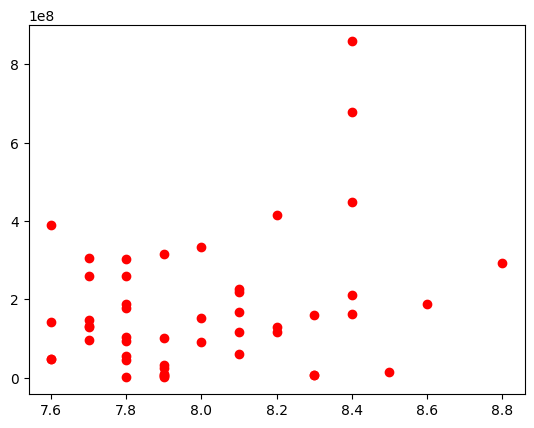

In [16]:
# Initialize lists to store data
director_coefficients = []
all_bilheteriaOrdenada = []
all_imdb_ratings = []

# Iterate through directors
for x in directors:
    # Filter movies for the current director
    tempData = movies[movies["Director"] == x]

    # Remove rows with NaN values in the "Gross" column
    tempData = tempData.dropna(subset=["Gross"])

    # Convert "Gross" values to integers after removing commas
    bilheteriaOrdenada = [int(str(x).replace(',', ''))
                          for x in tempData["Gross"]]

    # Extract IMDB ratings
    imdb_ratings = tempData["IMDB_Rating"]

    # Check if there are enough data points to fit a linear regression model
    if len(bilheteriaOrdenada) > 1:
        # Plot the data points
        plt.plot(imdb_ratings, bilheteriaOrdenada, 'ro')

        # Fit a linear regression model
        coefficients = np.polyfit(
            np.log(bilheteriaOrdenada), np.log(imdb_ratings.to_list()), 1)

        for bilheteria in bilheteriaOrdenada:
            all_bilheteriaOrdenada.append(bilheteria)
        for rate in imdb_ratings.to_list():
            all_imdb_ratings.append(rate)

        # Append the coefficients to the list
        director_coefficients.append((x, coefficients))
print(director_coefficients)

/tmp/ipykernel_9539/3890523144.py:3: RuntimeWarning: divide by zero encountered in log
  return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]


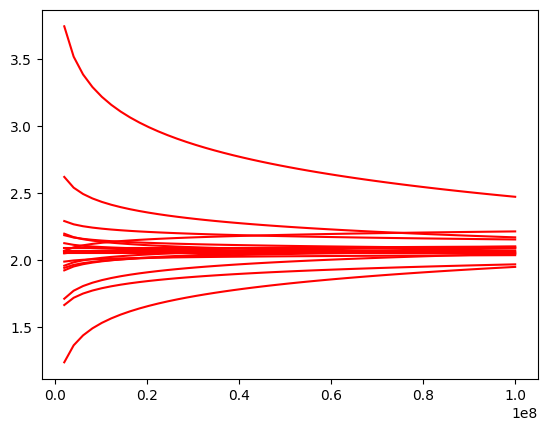

In [17]:
for director_coefficient in director_coefficients:
    def f(x):
        return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]

    if director_coefficient[1][0] > 10 or director_coefficient[1][1] > 10:
        continue

    # ax = plt.subplots()
    # ax.plot(x, f(x))
    # ax.set_xscale('log')

    x = np.linspace(0, 10**8)
    plt.plot(x, f(x), color='red')
    # plt.ylim(7, 10)

[292576195, 188020017, 448139099, 188373161, 13092000, 151101803, 858373000, 678815482, 259766572, 209726015, 415004880, 162805434, 54117416, 142502728, 159227644, 304360277, 7098492, 1330596, 6857096, 92054159, 100546139, 46889293, 128012934, 116900694, 7000000, 226277068, 117624028, 59100318, 32015231, 45512466, 167767189, 102515793, 96962694, 217581231, 177002924, 333176600, 389813101, 5202582, 315058289, 349555, 8114627, 25379975, 258366855, 303003568, 93617009, 132092958, 128261724, 146408305, 48071303]
[8.8, 8.6, 8.4, 7.8, 8.5, 8.0, 8.4, 8.4, 7.7, 8.4, 8.2, 8.4, 7.8, 7.6, 8.3, 7.7, 8.3, 7.8, 8.3, 8.0, 7.9, 7.6, 8.2, 8.2, 7.9, 8.1, 8.1, 8.1, 7.9, 7.8, 8.1, 7.8, 7.7, 8.1, 7.8, 8.0, 7.6, 7.9, 7.9, 7.9, 7.9, 7.9, 7.8, 7.8, 7.8, 7.7, 7.7, 7.7, 7.6]
495887062.68613243


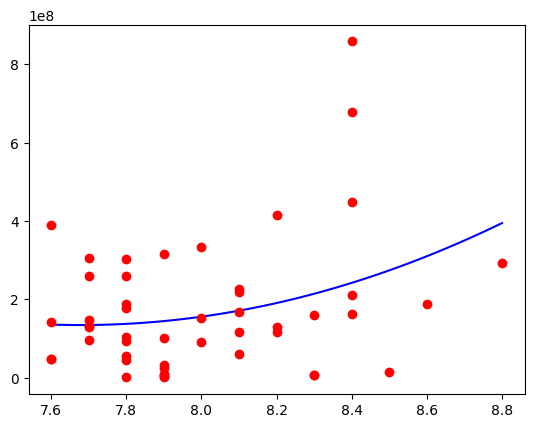

In [18]:
degree = 2

all_coefficients = np.polyfit(all_imdb_ratings,
    all_bilheteriaOrdenada, degree)

def f(x):
    response = 0
    for dg in range(0, degree+1):
        response += all_coefficients[dg]*(x**(degree-dg))
    return response

print(all_bilheteriaOrdenada)
print(all_imdb_ratings)
#print(all_coefficients)
x = np.linspace(min(all_imdb_ratings), max(all_imdb_ratings))
plt.plot(x, f(x), color='blue')
#plt.ylim(2.06, 2.08)

plt.plot(all_imdb_ratings, all_bilheteriaOrdenada, 'ro')

print(f(9))


In [19]:
for x in director_coefficients:
    p = np.poly1d([x[1][0], x[1][1]])
    print(p)

 
0.04192 x + 1.315
 
-0.02479 x + 2.546
 
0.07795 x + 0.5329
 
-0.03531 x + 2.805
 
0.03219 x + 1.475
 
-0.1158 x + 4.304
 
0.03711 x + 1.531
 
-0.0179 x + 2.387
 
0.01302 x + 1.862
 
7.222e-16 x + 2.092
 
0.03647 x + 1.429
 
0.08617 x + 0.4604
 
0.1828 x - 1.418
 
-0.3267 x + 8.491
 
-5.346e-17 x + 2.067
 
5.735e-16 x + 2.067
 
-3.205e-15 x + 2.054
 
-0.03748 x + 2.742
 
0.01233 x + 1.81


In [20]:
from Actor import Actor

actors = []
actors_name = []

for index, row in movies.iterrows():

    movie_gross = 0
    if not str(row["Gross"]) == 'nan':
        movie_gross = int(str(row["Gross"]).replace(",", ""))
    
    if not row["Star1"] in actors_name:
        actors_name.append(row["Star1"])
        actors.append(Actor(row["Star1"]))
    
    if not row["Star2"] in actors_name:
        actors_name.append(row["Star2"])
        actors.append(Actor(row["Star2"]))
    
    if not row["Star3"] in actors_name:
        actors_name.append(row["Star3"])
        actors.append(Actor(row["Star3"]))
    
    if not row["Star4"] in actors_name:
        actors_name.append(row["Star4"])
        actors.append(Actor(row["Star4"]))

    for actor in actors:
        if actor.name == row["Star1"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star2"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star3"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star4"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

for actor in actors:
    print(actor.name, actor.avgGross)

Leonardo DiCaprio 140466330.83333334
Joseph Gordon-Levitt 109196795.66666667
Elliot Page 146288097.5
Ken Watanabe 146288097.5
Kang-ho Song 26683922.0
Lee Sun-kyun 26683922.0
Cho Yeo-jeong 26683922.0
Choi Woo-sik 26683922.0
Matthew McConaughey 88235949.75
Anne Hathaway 212053038.66666666
Jessica Chastain 138817893.33333334
Mackenzie Foy 63119723.0
Joaquin Phoenix 120339854.0
Robert De Niro 118636067.25
Zazie Beetz 167725655.5
Frances Conroy 167725655.5
Miles Teller 10477350.333333334
J.K. Simmons 54731267.666666664
Melissa Benoist 6546000.0
Paul Reiser 6546000.0
Éric Toledano 6591140.5
François Cluzet 6591140.5
Omar Sy 6591140.5
Anne Le Ny 6591140.5
Zain Al Rafeea 830548.0
Yordanos Shiferaw 830548.0
Boluwatife Treasure Bankole 830548.0
Kawsar Al Haddad 830548.0
Peter Ramsey 95120655.0
Rodney Rothman 95120655.0
Shameik Moore 95120655.0
Jake Johnson 95120655.0
Joe Russo 449238763.5
Robert Downey Jr. 512396160.6666667
Chris Evans 261660107.0
Mark Ruffalo 396051941.0
Chris Hemsworth 3312912

In [31]:
from Director import Director 
directors = []
directors_name = []

for index, row in movies.iterrows():
    if not row["Director"] in directors_name:
        directors_name.append(row["Director"])
        directors.append(Director(row["Director"]))

    for director in directors:
        if director.name == row["Director"]:
            director.movies.append(row["Series_Title"])
            director.avgGross = ((director.avgGross*(len(director.movies)-1)) + float(row["Gross"].replace(",","")))/len(director.movies)

for director in directors:
    print(f'Name: {director.name}\nRating: {director.avgGross:.0f}')
    print("="*10)

Name: Christopher Nolan
Rating: 279277118
Name: Bong Joon Ho
Rating: 53367844
Name: Todd Phillips
Rating: 335451311
Name: Damien Chazelle
Rating: 82096902
Name: Olivier Nakache
Rating: 13182281
Name: Nadine Labaki
Rating: 1661096
Name: Bob Persichetti
Rating: 190241310
Name: Anthony Russo
Rating: 598985018
Name: Lee Unkrich
Rating: 312365448
Name: Quentin Tarantino
Rating: 119808526
Name: Sam Mendes
Rating: 231793960
Name: Thomas Vinterberg
Rating: 687185
Name: Asghar Farhadi
Rating: 4214544
Name: Denis Villeneuve
Rating: 61586672
Name: Peter Farrelly
Rating: 85080171
Name: Martin McDonagh
Rating: 54513740
Name: Gavin O'Connor
Rating: 13657115
Name: Martin Scorsese
Rating: 83971209
Name: Céline Sciamma
Rating: 3759854
Name: Xavier Dolan
Rating: 3492754
Name: James Mangold
Rating: 171950548
Name: Lenny Abrahamson
Rating: 14677674
Name: Damián Szifron
Rating: 3107072
Name: Wes Anderson
Rating: 45542672
Name: David Fincher
Rating: 122415225
Name: Dean DeBlois
Rating: 197292078
Name: Garth

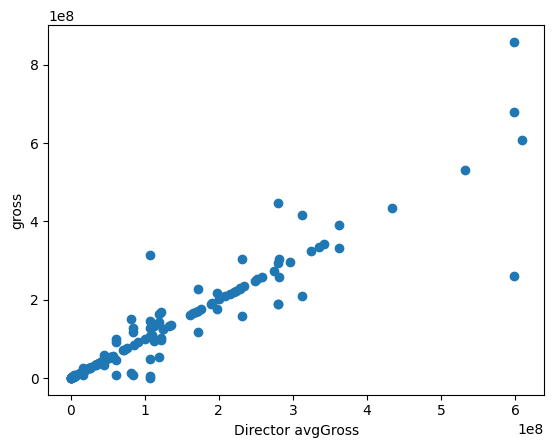

Zeros em rating: 0
Zeros em gross: 0


In [32]:
directorRating = []
bilheteria = []


for index, row in movies.iterrows():
  try:
    bilheteria.append(float(row['Gross']))
  except:
    bilheteria.append(float(row['Gross'].replace(",","")))
  
  for director in directors:
    if(row['Director'] == director.name):
      directorRating.append(director.avgGross)
      break

plt.scatter(np.array(directorRating), np.array(bilheteria))

plt.xlabel("Director avgGross")
plt.ylabel("gross")

plt.show()

#Verificando se há valores não numéricos ou zeros
zerosdirector = 0
for rating in directorRating:
  if(not rating):
    zerosdirector += 1

zerosBilheteria = 0
for bilhe in bilheteria:
  if(not bilhe):
    zerosBilheteria += 1


print(f"Zeros em rating: {zerosdirector}")
print(f"Zeros em gross: {zerosBilheteria}")



In [ ]:
corr_matrix = np.corrcoef(directorRating, bilheteria)
corr = corr_matrix[0,1]
 
print(f"{corr}")

0.1314341777432866
